<span style="color: rgba(27,213,227,1); font-size: 30px;">Лабораторна робота №3</span><br>
<span style="color: rgba(27,213,227,1); font-size: 24px;">студентки групи МІТ-31</span><br>
<span style="color: rgba(27,213,227,1); font-size: 24px;">Шмат Катерини Сергіївни</span><br>
<span style="color: rgba(27,213,227,1); font-size: 26px;">Частина друга</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df.replace({'Male': 0, 'Female':1, 'No': 0, 'Yes':1, 'Dinner':0, 'Lunch':1, 'Mon':0, 'Tue':1, 'Wed':2, 'Thur':3, 'Fri':4, 'Sat':5, 'Sun':6}, None, True)

In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,0,6,0,2
1,10.34,1.66,0,0,6,0,3
2,21.01,3.50,0,0,6,0,3
3,23.68,3.31,0,0,6,0,2
4,24.59,3.61,1,0,6,0,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,0,0,5,0,3
240,27.18,2.00,1,1,5,0,2
241,22.67,2.00,0,1,5,0,2
242,17.82,1.75,0,0,5,0,2
243,18.78,3.00,1,0,3,0,2


<span style="color: rgba(27,213,227,1); font-size: 26px;">Classes in size</span>

In [5]:
print("size")
print(df['size'].unique())

size
[2 3 4 1 6 5]


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    int64  
 3   smoker      244 non-null    int64  
 4   day         244 non-null    int64  
 5   time        244 non-null    int64  
 6   size        244 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 13.5 KB


<span style="color: rgba(27,213,227,1); font-size: 26px;">Description</span>

In [7]:
df.describe()

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.356557,0.381148,4.725410,0.278689,2.569672
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100
min,3.070000,1.000000,0.000000,0.000000,3.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,0.000000,3.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,0.000000,5.000000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,1.000000,6.000000,1.000000,3.000000
max,50.810000,10.000000,1.000000,1.000000,6.000000,1.000000,6.000000


<span style="color: rgba(27,213,227,1); font-size: 26px;">Data Classes from original dataset</span>

D:\Download\Apps\Anaconda\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


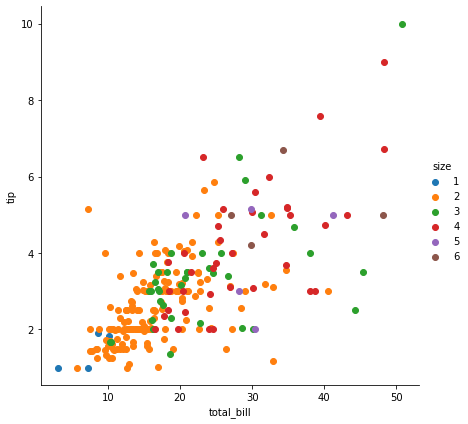

In [8]:
sns.FacetGrid(df, hue="size", size=6) \
   .map(plt.scatter, "total_bill", "tip") \
   .add_legend()

plt.show()

<span style="color: rgba(27,213,227,1); font-size: 26px;">Preprocessing Steps: Separating Independent Features and Dependant Feature(Response)</span>

In [10]:
features = list(df.columns[1:6])            	
target = df.columns[6]                     

print('Features:',features)
print('Target:',target)

# store feature matrix in "X"
X = df.iloc[:,1:6]                         

# store response vector in "y"
y = df.iloc[:,6]                           


print(y.shape)
print(X.shape)

Features: ['tip', 'sex', 'smoker', 'day', 'time']
Target: size
(244,)
(244, 5)


<span style="color: rgba(27,213,227,1); font-size: 26px;">Converting Response Variable 'Size' to numbers to train model and add column</span>

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y=le.transform(y)


df['Encodedsize'] = y

print('Classes:',le.classes_)
print('Response variable after encoding:',y)
df.tail(10)

Classes: [1 2 3 4 5 6]
Response variable after encoding: [1 2 2 1 3 3 1 3 1 1 1 3 1 3 1 1 2 2 2 2 1 1 1 3 1 3 1 1 1 1 1 3 1 3 1 2 2
 2 2 2 2 1 1 1 3 1 1 3 2 1 1 1 3 1 3 1 3 1 1 3 1 1 1 3 2 2 1 0 1 1 1 2 1 1
 1 1 1 3 1 1 1 1 0 1 1 3 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 0 2 1 2 1 3 1 1 3 1 1 1 1 1 5 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 5 4 5 1 1 2 1
 1 1 1 1 2 3 3 4 5 3 1 3 3 1 2 1 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 3 1 2 3 1
 4 2 4 2 2 1 1 1 1 1 1 1 3 1 1 2 1 1 1 3 2 2 3 1 1 2 3 3 1 2 1 4 1 1 3 1 1
 0 2 1 1 1 3 1 1 3 2 1 1 1 1 1 1 2 2 1 1 1 1]


,total_bill,tip,sex,smoker,day,time,size,Encodedsize
234,15.53,3.00,0,1,5,0,2,1
235,10.07,1.25,0,0,5,0,2,1
236,12.60,1.00,0,1,5,0,2,1
237,32.83,1.17,0,1,5,0,2,1
238,35.83,4.67,1,0,5,0,3,2
239,29.03,5.92,0,0,5,0,3,2
240,27.18,2.00,1,1,5,0,2,1
241,22.67,2.00,0,1,5,0,2,1
242,17.82,1.75,0,0,5,0,2,1
243,18.78,3.00,1,0,3,0,2,1


<span style="color: rgba(27,213,227,1); font-size: 26px;">Classification Models</span><br>
<span style="color: rgba(27,213,227,1); font-size: 26px;">1 KNN Model</span>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [13]:
value = knn.predict([[3, 5, 4, 2, 1]])
print('prediction value:',value)

print('Predicted Class', df.loc[df['Encodedsize'] == 2, 'size'].values[0])

prediction value: [2]
Predicted Class 3


In [14]:
X_new = [[3, 5, 4, 2, 1], [5, 4, 3, 2, 1]]                       
knn.predict(X_new)

array([2, 3], dtype=int64)

In [15]:
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
print(knn.predict(X_new))

kypred = knn.predict(X)

[1 1]


<span style="color: rgba(27,213,227,1); font-size: 26px;">How to check the best value for K?</span>

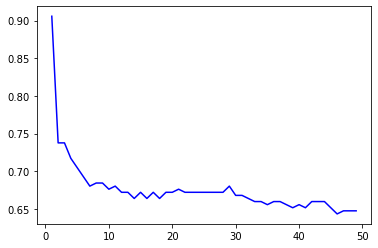

In [16]:
from sklearn import metrics
v=[]

k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X, y)
    k_pred = knn.predict(X)
    v.append( metrics.accuracy_score(y, k_pred))


import matplotlib.pyplot as plt
plt.plot(k_range,v,c='Blue',)
plt.show()

<span style="color: rgba(27,213,227,1); font-size: 26px;">KNN ACCURACY</span>

In [17]:
from sklearn import metrics
print(metrics.accuracy_score(y, kypred))

0.7049180327868853


<span style="color: rgba(27,213,227,1); font-size: 26px;">Evaluation procedure: Train/test split</span>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [19]:
print(X_train.shape)
print(y_train.shape)

(146, 5)
(146,)


<span style="color: rgba(27,213,227,1); font-size: 26px;">KNN with Train Test</span>

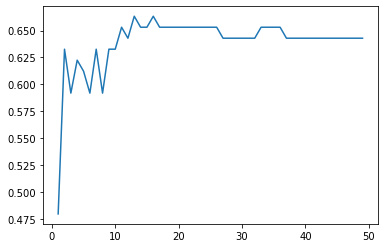

In [20]:
from sklearn import metrics
v=[]


k_range = list(range(1, 50))
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit the model with data
    knn.fit(X_train, y_train)
    k_pred = knn.predict(X_test)
    v.append( metrics.accuracy_score(y_test, k_pred))



import matplotlib.pyplot as plt
plt.plot(k_range,v)

plt.show()

In [21]:
knn = KNeighborsClassifier(n_neighbors=12)
# fit the model with data
knn.fit(X_train, y_train)
k_pred = knn.predict(X_test)

metrics.accuracy_score(y_test, k_pred)

0.6428571428571429